# Importing Libraries

In [25]:
# importing libraries
# https://anaconda.org/mzh/pyflux
import pandas as pd
import numpy as np
import seaborn as sns 
%matplotlib inline 
from pylab import rcParams
from pandas import datetime
from matplotlib import pyplot as plt
import os
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pyflux as pf
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [26]:
#setting visualisation size
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

# Energy Data

In [27]:
# importing daily dataset files
block_0 = pd.read_csv(r"C:\Users\m\Desktop\Masters Modules\MS5103 Business Analytics Project\Datasets\Smart Meters\Cleaned Data\daily_dataset\block_0.csv")
block_1 = pd.read_csv(r"C:\Users\m\Desktop\Masters Modules\MS5103 Business Analytics Project\Datasets\Smart Meters\Cleaned Data\daily_dataset\block_1.csv")
block_2 = pd.read_csv(r"C:\Users\m\Desktop\Masters Modules\MS5103 Business Analytics Project\Datasets\Smart Meters\Cleaned Data\daily_dataset\block_2.csv")
block_3 = pd.read_csv(r"C:\Users\m\Desktop\Masters Modules\MS5103 Business Analytics Project\Datasets\Smart Meters\Cleaned Data\daily_dataset\block_3.csv")
block_4 = pd.read_csv(r"C:\Users\m\Desktop\Masters Modules\MS5103 Business Analytics Project\Datasets\Smart Meters\Cleaned Data\daily_dataset\block_4.csv")
block_5 = pd.read_csv(r"C:\Users\m\Desktop\Masters Modules\MS5103 Business Analytics Project\Datasets\Smart Meters\Cleaned Data\daily_dataset\block_5.csv")
block_6 = pd.read_csv(r"C:\Users\m\Desktop\Masters Modules\MS5103 Business Analytics Project\Datasets\Smart Meters\Cleaned Data\daily_dataset\block_6.csv")
block_7 = pd.read_csv(r"C:\Users\m\Desktop\Masters Modules\MS5103 Business Analytics Project\Datasets\Smart Meters\Cleaned Data\daily_dataset\block_7.csv")
household_acorn_info = pd.read_csv(r"C:\Users\m\Desktop\Masters Modules\MS5103 Business Analytics Project\Datasets\Smart Meters\Cleaned Data\informations_households_Cleaned.csv")

In [28]:
# checking the number of rows of first file
len(block_0)

15465

In [29]:
# adding all files in one data frame
Dfs = [block_0, block_1, block_2, block_3, block_4, block_5, block_6,block_7]
Combined = pd.concat(Dfs)

In [30]:
# checking the number of rows in each dataframe
len(Combined)

105609

In [31]:
# checking that the combined data frame 
Combined.head(5)

,Household_Id,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000002,01/01/2013,0.1925,0.225000,0.886,48,0.164066,10.800,0.076
1,MAC000002,01/02/2013,0.2365,0.277083,1.078,48,0.189625,13.300,0.073
2,MAC000002,01/03/2013,0.1955,0.209875,1.098,48,0.154632,10.074,0.075
3,MAC000002,01/04/2013,0.1815,0.205354,0.662,48,0.132950,9.857,0.072
4,MAC000002,01/05/2013,0.1975,0.232729,1.181,48,0.186772,11.171,0.075


In [32]:
household_acorn_info.head(5)

,Household_Id,Usage_Type,Acorn,Acorn_grouped,file
0,MAC000002,Fixed,ACORN-A,Affluent,block_0
1,MAC003613,Fixed,ACORN-A,Affluent,block_0
2,MAC003597,Fixed,ACORN-A,Affluent,block_0
3,MAC003579,Fixed,ACORN-A,Affluent,block_0
4,MAC003566,Fixed,ACORN-A,Affluent,block_0


In [33]:
Combined.rename(columns = {"day" : "date"}, inplace = True)


In [34]:
Combined =  Combined.merge(household_acorn_info,on='Household_Id').reset_index()

In [35]:
# checking data types of each column
Combined.dtypes

index              int64
Household_Id      object
date              object
energy_median    float64
energy_mean      float64
energy_max       float64
energy_count       int64
energy_std       float64
energy_sum       float64
energy_min       float64
Usage_Type        object
Acorn             object
Acorn_grouped     object
file              object
dtype: object

In [36]:
Combined.Acorn.unique()


array(['ACORN-A', 'ACORN-B', 'ACORN-C', 'ACORN-D'], dtype=object)

In [37]:
Combined=Combined.loc[Combined['Acorn']!='ACORN-D']
Combined.head(5)

,index,Household_Id,date,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,Usage_Type,Acorn,Acorn_grouped,file
0,0,MAC000002,01/01/2013,0.1925,0.225000,0.886,48,0.164066,10.800,0.076,Fixed,ACORN-A,Affluent,block_0
1,1,MAC000002,01/02/2013,0.2365,0.277083,1.078,48,0.189625,13.300,0.073,Fixed,ACORN-A,Affluent,block_0
2,2,MAC000002,01/03/2013,0.1955,0.209875,1.098,48,0.154632,10.074,0.075,Fixed,ACORN-A,Affluent,block_0
3,3,MAC000002,01/04/2013,0.1815,0.205354,0.662,48,0.132950,9.857,0.072,Fixed,ACORN-A,Affluent,block_0
4,4,MAC000002,01/05/2013,0.1975,0.232729,1.181,48,0.186772,11.171,0.075,Fixed,ACORN-A,Affluent,block_0


In [38]:
Combined.Acorn.unique()

array(['ACORN-A', 'ACORN-B', 'ACORN-C'], dtype=object)

In [39]:
Combined= Combined.drop(['index','Usage_Type','Acorn', 'Acorn_grouped','file'], axis = 1)

In [40]:
Combined.head(5)

,Household_Id,date,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000002,01/01/2013,0.1925,0.225000,0.886,48,0.164066,10.800,0.076
1,MAC000002,01/02/2013,0.2365,0.277083,1.078,48,0.189625,13.300,0.073
2,MAC000002,01/03/2013,0.1955,0.209875,1.098,48,0.154632,10.074,0.075
3,MAC000002,01/04/2013,0.1815,0.205354,0.662,48,0.132950,9.857,0.072
4,MAC000002,01/05/2013,0.1975,0.232729,1.181,48,0.186772,11.171,0.075


In [41]:
len(Combined)

90023

In [42]:
# saving the combined data frame in folder
Combined.to_csv(r'C:\Users\m\Desktop\Masters Modules\MS5103 Business Analytics Project\Datasets\Smart Meters\Cleaned Data\daily_dataset\AffluentAchievers.csv', index = False)

In [43]:
# checking how many households have data for each day
households_per_day = Combined.groupby('date')[['Household_Id']].nunique()
households_per_day.head(5)

,Household_Id
date,
01/01/2013,253
01/02/2013,253
01/03/2013,253
01/04/2013,253
01/05/2013,253


In [44]:
# getting the total energy per day and total number of households per day
Combined_Energy_Sum = Combined.groupby('date')[['energy_sum']].sum()
Combined = Combined_Energy_Sum.merge(households_per_day, on = ['date'])
Combined = Combined.reset_index()

In [45]:
# checking if it looks right
Combined.head(5)

,date,energy_sum,Household_Id
0,01/01/2013,4820.197000,253
1,01/02/2013,4765.644001,253
2,01/03/2013,4383.985001,253
3,01/04/2013,4451.617001,253
4,01/05/2013,4462.652999,253


In [46]:
# creating an evg_energy column by diving the total energy by number of households per day
Combined['average_energy'] =  Combined['energy_sum']/Combined['Household_Id']

In [47]:
# checking if the avg energy column is added
Combined.head(5)

,date,energy_sum,Household_Id,average_energy
0,01/01/2013,4820.197000,253,19.052162
1,01/02/2013,4765.644001,253,18.836538
2,01/03/2013,4383.985001,253,17.328004
3,01/04/2013,4451.617001,253,17.595324
4,01/05/2013,4462.652999,253,17.638945


In [48]:
Combined['date'].nunique()

365

In [49]:
# checking the start and end date of data
# should start on the 01/01/2013 and end on 31/12/2013
print("Starting Date",min(Combined.date))
print("Ending Date",max(Combined.date))

Starting Date 01/01/2013
Ending Date 31/12/2013


In [50]:
# checking min and max avg_energy and rounding to 2 decimal places
print("Average Energy Max:",round(Combined["average_energy"].max(),2))
print("Average Energy Min:", round(Combined["average_energy"].min(),2))

Average Energy Max: 22.31
Average Energy Min: 11.1


In [51]:
# describing the data
Combined.describe()

,energy_sum,Household_Id,average_energy
count,365.000000,365.000000,365.000000
mean,3739.462279,246.638356,15.164558
std,666.893593,5.339121,2.686530
min,2740.558000,234.000000,11.095377
25%,3150.202000,243.000000,12.685188
50%,3568.058998,249.000000,14.527146
75%,4294.089998,250.000000,17.498047
max,5540.118002,253.000000,22.314679


# Weather Data

In [52]:
# importing weather_daily_darksky data
# NOTE: make sure you change the time column in the weather_daily_darksky data to a date in excel before you import the data
# NOTE: you can also change the time column name to day so you don't have to do it in the code
Weather =  pd.read_csv(r"C:\Users\m\Desktop\Masters Modules\MS5103 Business Analytics Project\Datasets\Smart Meters\smart-meters-in-london\weather_daily_darksky.csv")

In [53]:
Weather.head(5)

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,11/11/2011 23:00,123,fog,9.40,11/11/2011 07:00,0.79,3.88,1016.08,11/11/2011 07:00,...,10.87,11/11/2011 07:12,11/11/2011 19:00,11/11/2011 11:00,Foggy until afternoon.,11/11/2011 19:00,6.48,11/11/2011 23:00,11/11/2011 19:00,0.52
1,8.59,11/12/2011 14:00,198,partly-cloudy-day,4.49,11/12/2011 01:00,0.56,3.94,1007.71,11/12/2011 02:00,...,8.59,11/12/2011 07:57,11/12/2011 14:00,11/12/2011 12:00,Partly cloudy throughout the day.,12/12/2011 07:00,0.11,11/12/2011 20:00,12/12/2011 08:00,0.53
2,10.33,27/12/2011 02:00,225,partly-cloudy-day,5.47,27/12/2011 23:00,0.85,3.54,1032.76,27/12/2011 22:00,...,10.33,27/12/2011 08:07,27/12/2011 14:00,27/12/2011 00:00,Mostly cloudy throughout the day.,27/12/2011 23:00,5.59,27/12/2011 02:00,28/12/2011 00:00,0.10
3,8.07,02/12/2011 23:00,232,wind,3.69,02/12/2011 07:00,0.32,3.00,1012.12,02/12/2011 07:00,...,7.36,02/12/2011 07:46,02/12/2011 12:00,02/12/2011 10:00,Partly cloudy throughout the day and breezy ov...,02/12/2011 19:00,0.46,02/12/2011 12:00,02/12/2011 19:00,0.25
4,8.22,24/12/2011 23:00,252,partly-cloudy-night,2.79,24/12/2011 07:00,0.37,4.46,1028.17,24/12/2011 07:00,...,7.93,24/12/2011 08:06,24/12/2011 15:00,24/12/2011 13:00,Mostly cloudy throughout the day.,24/12/2011 19:00,-0.51,24/12/2011 23:00,24/12/2011 20:00,0.99


In [54]:
# checking column names
Weather.columns

Index(['temperatureMax', 'temperatureMaxTime', 'windBearing', 'icon',
       'dewPoint', 'temperatureMinTime', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureMinTime', 'apparentTemperatureHigh', 'precipType',
       'visibility', 'humidity', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'time',
       'sunsetTime', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'sunriseTime', 'temperatureHighTime', 'uvIndexTime', 'summary',
       'temperatureLowTime', 'apparentTemperatureMin',
       'apparentTemperatureMaxTime', 'apparentTemperatureLowTime',
       'moonPhase'],
      dtype='object')

In [55]:
# Note: if you renamed the time columm to day in excel you can ignore this 
Weather.rename(columns = {"time" : "date"}, inplace = True)

In [56]:
# make sure the date format is dd/mm/yyyy
Combined.date.head(5)


0    01/01/2013
1    01/02/2013
2    01/03/2013
3    01/04/2013
4    01/05/2013
Name: date, dtype: object

In [57]:
# make sure the date format is dd/mm/yyyy
Weather.date.head(5)

0    11/11/2011
1    11/12/2011
2    27/12/2011
3    02/12/2011
4    24/12/2011
Name: date, dtype: object

In [58]:
# describing weather stats
Weather.describe()

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
count,882.000000,882.000000,882.000000,881.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,881.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,13.660113,195.702948,6.530034,0.477605,3.581803,1014.127540,12.723866,11.167143,0.781871,6.085045,12.929467,2.542565,7.709841,7.414161,13.542392,5.738039,0.500930
std,6.182744,89.340783,4.830875,0.193514,1.694007,11.073038,7.279168,2.466109,0.095348,6.031967,7.105426,1.832985,4.871004,4.888852,6.260196,6.048746,0.287022
min,-0.060000,0.000000,-7.840000,0.000000,0.200000,979.250000,-6.460000,1.480000,0.430000,-8.880000,-4.110000,0.000000,-5.640000,-5.640000,-0.810000,-8.880000,0.000000
25%,9.502500,120.500000,3.180000,0.350000,2.370000,1007.435000,7.032500,10.327500,0.720000,1.522500,7.332500,1.000000,3.990000,3.705000,9.212500,1.105000,0.260000
50%,12.625000,219.000000,6.380000,0.470000,3.440000,1014.615000,12.470000,11.970000,0.790000,5.315000,12.625000,2.000000,7.540000,7.100000,12.470000,4.885000,0.500000
75%,17.920000,255.000000,10.057500,0.600000,4.577500,1021.755000,17.910000,12.830000,0.860000,11.467500,17.920000,4.000000,11.467500,11.277500,17.910000,11.277500,0.750000
max,32.400000,359.000000,17.770000,1.000000,9.960000,1040.920000,32.420000,15.340000,0.980000,20.540000,32.420000,7.000000,20.540000,20.540000,32.400000,20.540000,0.990000


In [59]:
# selecting numeric variables
Weather=Weather.drop(['icon','temperatureMaxTime', 'icon', 'temperatureMinTime', 'apparentTemperatureMinTime','precipType',
                       'apparentTemperatureHighTime', 'sunsetTime', 'sunriseTime', 'temperatureHighTime', 'uvIndexTime',
                     'summary','temperatureLowTime', 'apparentTemperatureMaxTime', 'apparentTemperatureLowTime', 'apparentTemperatureHigh',
                     'apparentTemperatureLow', 'apparentTemperatureMax', 'apparentTemperatureMin'], axis=1)
Weather = Weather.dropna()

In [60]:
# checking if only numeric variables are in the dataframe
Weather.head(5)

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,visibility,humidity,uvIndex,date,temperatureLow,temperatureMin,temperatureHigh,moonPhase
0,11.96,123,9.40,0.79,3.88,1016.08,3.30,0.95,1.0,11/11/2011,10.87,8.85,10.87,0.52
1,8.59,198,4.49,0.56,3.94,1007.71,12.09,0.88,1.0,11/12/2011,3.09,2.48,8.59,0.53
2,10.33,225,5.47,0.85,3.54,1032.76,13.39,0.74,0.0,27/12/2011,8.03,8.03,10.33,0.10
3,8.07,232,3.69,0.32,3.00,1012.12,11.89,0.87,1.0,02/12/2011,6.33,2.56,7.36,0.25
4,8.22,252,2.79,0.37,4.46,1028.17,13.16,0.80,1.0,24/12/2011,7.45,3.17,7.93,0.99


In [61]:
# combining the original data with weather data
# as the original data and weather data have a day column, we will merge on that 
Combined2 =  Combined.merge(Weather,on='date')

# checking if it has merged
Combined2.head(5)

,date,energy_sum,Household_Id,average_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,visibility,humidity,uvIndex,temperatureLow,temperatureMin,temperatureHigh,moonPhase
0,01/01/2013,4820.197000,253,19.052162,7.49,257,2.40,0.43,4.00,1016.89,13.15,0.82,1.0,4.42,3.31,5.76,0.63
1,01/02/2013,4765.644001,253,18.836538,8.03,265,3.73,0.49,2.83,1002.38,12.50,0.85,1.0,2.90,4.16,7.33,0.68
2,01/03/2013,4383.985001,253,17.328004,6.62,37,0.98,0.83,3.77,1029.18,10.27,0.78,1.0,2.58,2.58,6.62,0.62
3,01/04/2013,4451.617001,253,17.595324,7.71,54,-4.69,0.20,5.50,1014.63,13.02,0.57,3.0,0.48,0.04,7.71,0.72
4,01/05/2013,4462.652999,253,17.638945,16.96,52,-1.68,0.20,2.90,1022.70,15.34,0.43,5.0,4.48,5.43,16.96,0.75


In [62]:
# the number of rows should be 365
# this is because we got average energy for each day and there are 365 days in a year
len(Combined2)

365

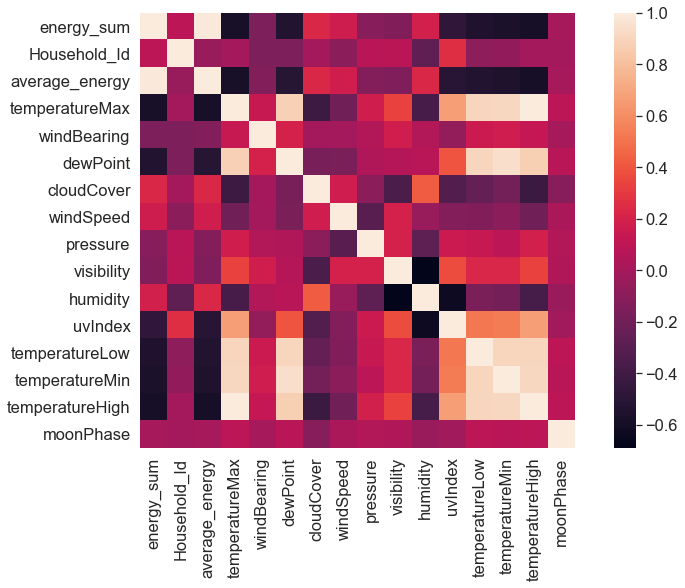

In [63]:
# correlation matrix plot 
Correlation_Matrix = Combined2.corr(method = "pearson")
sns.heatmap(Correlation_Matrix, vmax=1, square= True)

In [64]:
Combined2.head(5)

,date,energy_sum,Household_Id,average_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,visibility,humidity,uvIndex,temperatureLow,temperatureMin,temperatureHigh,moonPhase
0,01/01/2013,4820.197000,253,19.052162,7.49,257,2.40,0.43,4.00,1016.89,13.15,0.82,1.0,4.42,3.31,5.76,0.63
1,01/02/2013,4765.644001,253,18.836538,8.03,265,3.73,0.49,2.83,1002.38,12.50,0.85,1.0,2.90,4.16,7.33,0.68
2,01/03/2013,4383.985001,253,17.328004,6.62,37,0.98,0.83,3.77,1029.18,10.27,0.78,1.0,2.58,2.58,6.62,0.62
3,01/04/2013,4451.617001,253,17.595324,7.71,54,-4.69,0.20,5.50,1014.63,13.02,0.57,3.0,0.48,0.04,7.71,0.72
4,01/05/2013,4462.652999,253,17.638945,16.96,52,-1.68,0.20,2.90,1022.70,15.34,0.43,5.0,4.48,5.43,16.96,0.75


# Bank Holiday Data

In [65]:
# importing uk_bank_holidays data
Bank_Holiday_Dates = pd.read_csv(r'C:\Users\m\Desktop\Masters Modules\MS5103 Business Analytics Project\Datasets\Smart Meters\smart-meters-in-london/uk_bank_holidays.csv')
Bank_Holiday_Dates.head(5)

,Bank holidays,Type
0,26/12/2013,Boxing Day
1,25/12/2013,Christmas Day
2,26/08/2013,Summer bank holiday
3,27/05/2013,Spring bank holiday
4,05/06/2013,Early May bank holiday


In [66]:
Bank_Holiday_Dates.rename(columns = {"Bank holidays" : "date"}, inplace = True)

In [67]:
Combined2 = Combined2.merge(Bank_Holiday_Dates, left_on = 'date',right_on = 'date',how = 'left')

In [68]:
Combined2.loc[Combined2['Type'].notnull(), 'Type'] = 1
Combined2['Type']=Combined2['Type'].fillna(0)
Combined2.head(5)

,date,energy_sum,Household_Id,average_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,visibility,humidity,uvIndex,temperatureLow,temperatureMin,temperatureHigh,moonPhase,Type
0,01/01/2013,4820.197000,253,19.052162,7.49,257,2.40,0.43,4.00,1016.89,13.15,0.82,1.0,4.42,3.31,5.76,0.63,1
1,01/02/2013,4765.644001,253,18.836538,8.03,265,3.73,0.49,2.83,1002.38,12.50,0.85,1.0,2.90,4.16,7.33,0.68,0
2,01/03/2013,4383.985001,253,17.328004,6.62,37,0.98,0.83,3.77,1029.18,10.27,0.78,1.0,2.58,2.58,6.62,0.62,0
3,01/04/2013,4451.617001,253,17.595324,7.71,54,-4.69,0.20,5.50,1014.63,13.02,0.57,3.0,0.48,0.04,7.71,0.72,1
4,01/05/2013,4462.652999,253,17.638945,16.96,52,-1.68,0.20,2.90,1022.70,15.34,0.43,5.0,4.48,5.43,16.96,0.75,0


In [70]:
Combined2.Type.unique()

array([1, 0], dtype=int64)

In [71]:
Combined.rename(columns = {"Type" : "Bank Holiday Indicator"}, inplace = True)

In [72]:
# checking if Bank_Holiday column was added
# in the Bank_Holiday 1 means the day is a bank holiday and 0 means the day is not a bank holiday
# this makes sense as 01/01/2013 is New Year's day and the Bank_Holiday column has a 1
Combined2.head(5)

,date,energy_sum,Household_Id,average_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,visibility,humidity,uvIndex,temperatureLow,temperatureMin,temperatureHigh,moonPhase,Type
0,01/01/2013,4820.197000,253,19.052162,7.49,257,2.40,0.43,4.00,1016.89,13.15,0.82,1.0,4.42,3.31,5.76,0.63,1
1,01/02/2013,4765.644001,253,18.836538,8.03,265,3.73,0.49,2.83,1002.38,12.50,0.85,1.0,2.90,4.16,7.33,0.68,0
2,01/03/2013,4383.985001,253,17.328004,6.62,37,0.98,0.83,3.77,1029.18,10.27,0.78,1.0,2.58,2.58,6.62,0.62,0
3,01/04/2013,4451.617001,253,17.595324,7.71,54,-4.69,0.20,5.50,1014.63,13.02,0.57,3.0,0.48,0.04,7.71,0.72,1
4,01/05/2013,4462.652999,253,17.638945,16.96,52,-1.68,0.20,2.90,1022.70,15.34,0.43,5.0,4.48,5.43,16.96,0.75,0


In [73]:
# setting day column to a date
Combined2['date'] = Combined2['date'].astype('datetime64[D]')

In [74]:
Combined2.dtypes

date               datetime64[ns]
energy_sum                float64
Household_Id                int64
average_energy            float64
temperatureMax            float64
windBearing                 int64
dewPoint                  float64
cloudCover                float64
windSpeed                 float64
pressure                  float64
visibility                float64
humidity                  float64
uvIndex                   float64
temperatureLow            float64
temperatureMin            float64
temperatureHigh           float64
moonPhase                 float64
Type                        int64
dtype: object

In [75]:
# sorting date values
Combined2 = Combined2.sort_values(by = 'date')

In [76]:
# date values back to string
Combined2['date'] = Combined2['date'].dt.strftime('%d/%m/%Y')

In [77]:
# checking if month and year columns were added
Combined2.head(5)

,date,energy_sum,Household_Id,average_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,visibility,humidity,uvIndex,temperatureLow,temperatureMin,temperatureHigh,moonPhase,Type
0,01/01/2013,4820.197000,253,19.052162,7.49,257,2.40,0.43,4.00,1016.89,13.15,0.82,1.0,4.42,3.31,5.76,0.63,1
1,02/01/2013,4765.644001,253,18.836538,8.03,265,3.73,0.49,2.83,1002.38,12.50,0.85,1.0,2.90,4.16,7.33,0.68,0
2,03/01/2013,4383.985001,253,17.328004,6.62,37,0.98,0.83,3.77,1029.18,10.27,0.78,1.0,2.58,2.58,6.62,0.62,0
3,04/01/2013,4451.617001,253,17.595324,7.71,54,-4.69,0.20,5.50,1014.63,13.02,0.57,3.0,0.48,0.04,7.71,0.72,1
4,05/01/2013,4462.652999,253,17.638945,16.96,52,-1.68,0.20,2.90,1022.70,15.34,0.43,5.0,4.48,5.43,16.96,0.75,0


In [78]:
# setting day as an index
Combined2.set_index('date', inplace=True)

In [79]:
Combined2.rename(columns = {"Type" : "Bank_Holiday_Indicator"}, inplace = True)
Combined2.reset_index()

,date,energy_sum,Household_Id,average_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,visibility,humidity,uvIndex,temperatureLow,temperatureMin,temperatureHigh,moonPhase,Bank_Holiday_Indicator
0,01/01/2013,4820.197000,253,19.052162,7.49,257,2.40,0.43,4.00,1016.89,13.15,0.82,1.0,4.42,3.31,5.76,0.63,1
1,02/01/2013,4765.644001,253,18.836538,8.03,265,3.73,0.49,2.83,1002.38,12.50,0.85,1.0,2.90,4.16,7.33,0.68,0
2,03/01/2013,4383.985001,253,17.328004,6.62,37,0.98,0.83,3.77,1029.18,10.27,0.78,1.0,2.58,2.58,6.62,0.62,0
3,04/01/2013,4451.617001,253,17.595324,7.71,54,-4.69,0.20,5.50,1014.63,13.02,0.57,3.0,0.48,0.04,7.71,0.72,1
4,05/01/2013,4462.652999,253,17.638945,16.96,52,-1.68,0.20,2.90,1022.70,15.34,0.43,5.0,4.48,5.43,16.96,0.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,27/12/2013,4542.367999,234,19.411829,10.99,214,4.83,0.37,7.86,986.81,11.43,0.75,1.0,4.27,7.47,10.41,0.82,0
361,28/12/2013,4118.402002,234,17.600009,7.81,230,1.72,0.11,3.17,997.47,13.45,0.77,1.0,0.72,2.86,7.81,0.85,0
362,29/12/2013,4368.834000,234,18.670231,7.56,230,1.34,0.12,3.07,1014.89,14.08,0.84,1.0,5.23,0.72,7.15,0.89,0
363,30/12/2013,4165.693003,234,17.802107,10.22,201,5.98,0.55,6.58,1010.88,11.35,0.83,0.0,6.40,6.40,10.22,0.93,0


In [80]:
# checking if month and year columns were added
Combined2.head(5)

,energy_sum,Household_Id,average_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,visibility,humidity,uvIndex,temperatureLow,temperatureMin,temperatureHigh,moonPhase,Bank_Holiday_Indicator
date,,,,,,,,,,,,,,,,,
01/01/2013,4820.197000,253,19.052162,7.49,257,2.40,0.43,4.00,1016.89,13.15,0.82,1.0,4.42,3.31,5.76,0.63,1
02/01/2013,4765.644001,253,18.836538,8.03,265,3.73,0.49,2.83,1002.38,12.50,0.85,1.0,2.90,4.16,7.33,0.68,0
03/01/2013,4383.985001,253,17.328004,6.62,37,0.98,0.83,3.77,1029.18,10.27,0.78,1.0,2.58,2.58,6.62,0.62,0
04/01/2013,4451.617001,253,17.595324,7.71,54,-4.69,0.20,5.50,1014.63,13.02,0.57,3.0,0.48,0.04,7.71,0.72,1
05/01/2013,4462.652999,253,17.638945,16.96,52,-1.68,0.20,2.90,1022.70,15.34,0.43,5.0,4.48,5.43,16.96,0.75,0


# Models

In [81]:
# creating a new dataframe with avg_energy,Cluster and Bank_Holiday for modelling
Data_For_Model = Combined2[['average_energy', 'temperatureMax','dewPoint','uvIndex','temperatureLow','temperatureMin','temperatureHigh', 'Bank_Holiday_Indicator']]

# creating the training and test sets
# 70% training and 30% testing 
Training_Size = int(len(Data_For_Model)*0.8)
Training_Set, Testing_Set = Data_For_Model[0:Training_Size], Data_For_Model[Training_Size:len(Data_For_Model)]

In [82]:
# checking the number of training and test rows
print("Training rows:", len(Training_Set))
print("Test rows:", len(Testing_Set))

Training rows: 292
Test rows: 73


In [83]:
# checking the modelling data frame
# make sure that day,avg_energy,Cluster and Bank_Holiday columns are there
Data_For_Model.head(5)

,average_energy,temperatureMax,dewPoint,uvIndex,temperatureLow,temperatureMin,temperatureHigh,Bank_Holiday_Indicator
date,,,,,,,,
01/01/2013,19.052162,7.49,2.40,1.0,4.42,3.31,5.76,1
02/01/2013,18.836538,8.03,3.73,1.0,2.90,4.16,7.33,0
03/01/2013,17.328004,6.62,0.98,1.0,2.58,2.58,6.62,0
04/01/2013,17.595324,7.71,-4.69,3.0,0.48,0.04,7.71,1
05/01/2013,17.638945,16.96,-1.68,5.0,4.48,5.43,16.96,0


In [84]:
# Dickey Fuller's test
DFT = sm.tsa.adfuller(Training_Set.average_energy, autolag='AIC')
pd.Series(DFT[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])

Test Statistic                  -1.717955
p-value                          0.421886
Lags Used                       14.000000
Number of Observations Used    277.000000
dtype: float64

In [85]:
# function for differencing
def difference(dataset, interval):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset.iloc[i] - dataset.iloc[i - interval]
        diff.append(value)
    return diff

In [86]:
# Dickey Fuller's test with differencing function added
DFT2  = sm.tsa.adfuller(difference(Training_Set.average_energy,1), autolag='AIC')
pd.Series(DFT2[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])

Test Statistic                  -5.050929
p-value                          0.000018
Lags Used                       13.000000
Number of Observations Used    277.000000
dtype: float64

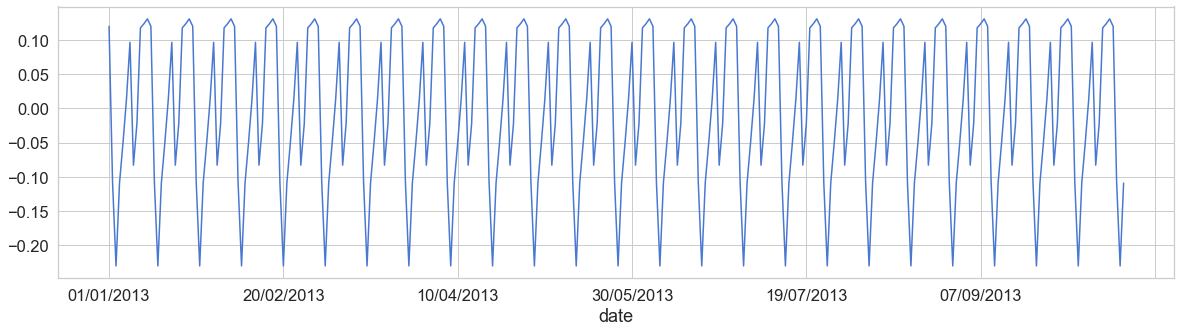

In [87]:
# seasonal decomposition
Seasonal_Decomposition = sm.tsa.seasonal_decompose(Training_Set.average_energy,freq=12)
Seasonal_Decomposition.seasonal.plot(figsize=(20,5))

Text(0.5, 1.0, 'Seasonal Decomposition')

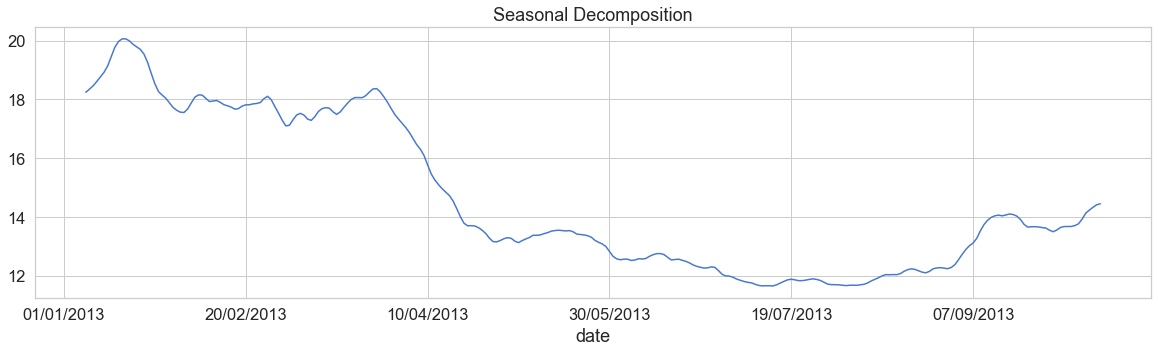

In [88]:
# seasonal decomposition plot
SDP =Seasonal_Decomposition.trend.plot(figsize=(20,5))
SDP.set_title("Seasonal Decomposition")


In [89]:
# Seasonal Arima Model
dependent_variable = Training_Set['average_energy']
predictor_variables = sm.add_constant(Training_Set[['temperatureMax','dewPoint','uvIndex','temperatureLow','temperatureMin','temperatureHigh','Bank_Holiday_Indicator']])

Model1 = sm.tsa.statespace.SARIMAX(endog=dependent_variable, exog=predictor_variables, order=(7,1,1),seasonal_order=(1,1, 0, 12),trend='c')
Model1_fit = Model1.fit()
Model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                      average_energy   No. Observations:                  292
Model:             SARIMAX(7, 1, 1)x(1, 1, [], 12)   Log Likelihood                -326.819
Date:                             Sun, 28 Jun 2020   AIC                            691.638
Time:                                     19:20:20   BIC                            760.631
Sample:                                          0   HQIC                           719.315
                                             - 292                                         
Covariance Type:                               opg                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                  0.0024      0.040      0.059      0.953      -0.077       0.082
const                   7.327e-08   4.93e-09     14.869      0.000    6.36e-08    8.29e-08
temperatureMax             0.0355      0.098      0.361      0.718      -0.157       0.228
dewPoint                  -0.0283      0.025     -1.154      0.249      -0.076       0.020
uvIndex                   -0.0808      0.047     -1.738      0.082      -0.172       0.010
temperatureLow             0.0018      0.018      0.102      0.919      -0.033       0.037
temperatureMin             0.0119      0.022      0.547      0.584      -0.031       0.055
temperatureHigh           -0.0307      0.094     -0.327      0.744      -0.215       0.153
Bank_Holiday_Indicator    -0.0908      0.277     -0.327      0.743      -0.634       0.453
ar.L1                      0.0533      0.256      0.208      0.835      -0.448       0.555
ar.L2                     -0.1237      0.072     -1.729      0.084      -0.264       0.017
ar.L3                     -0.2176      0.081     -2.672      0.008      -0.377      -0.058
ar.L4                     -0.1444      0.093     -1.548      0.122      -0.327       0.038
ar.L5                     -0.1057      0.093     -1.140      0.254      -0.288       0.076
ar.L6                     -0.0306      0.082     -0.375      0.708      -0.191       0.130
ar.L7                      0.2468      0.062      3.984      0.000       0.125       0.368
ma.L1                     -0.2140      0.259     -0.826      0.409      -0.722       0.294
ar.S.L12                  -0.4642      0.063     -7.319      0.000      -0.588      -0.340
sigma2                     0.6008      0.052     11.521      0.000       0.499       0.703
===================================================================================
Ljung-Box (Q):                       65.37   Jarque-Bera (JB):                 5.00
Prob(Q):                              0.01   Prob(JB):                         0.08
Heteroskedasticity (H):               0.38   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.85e+17. Standard errors may be unstable.
"""

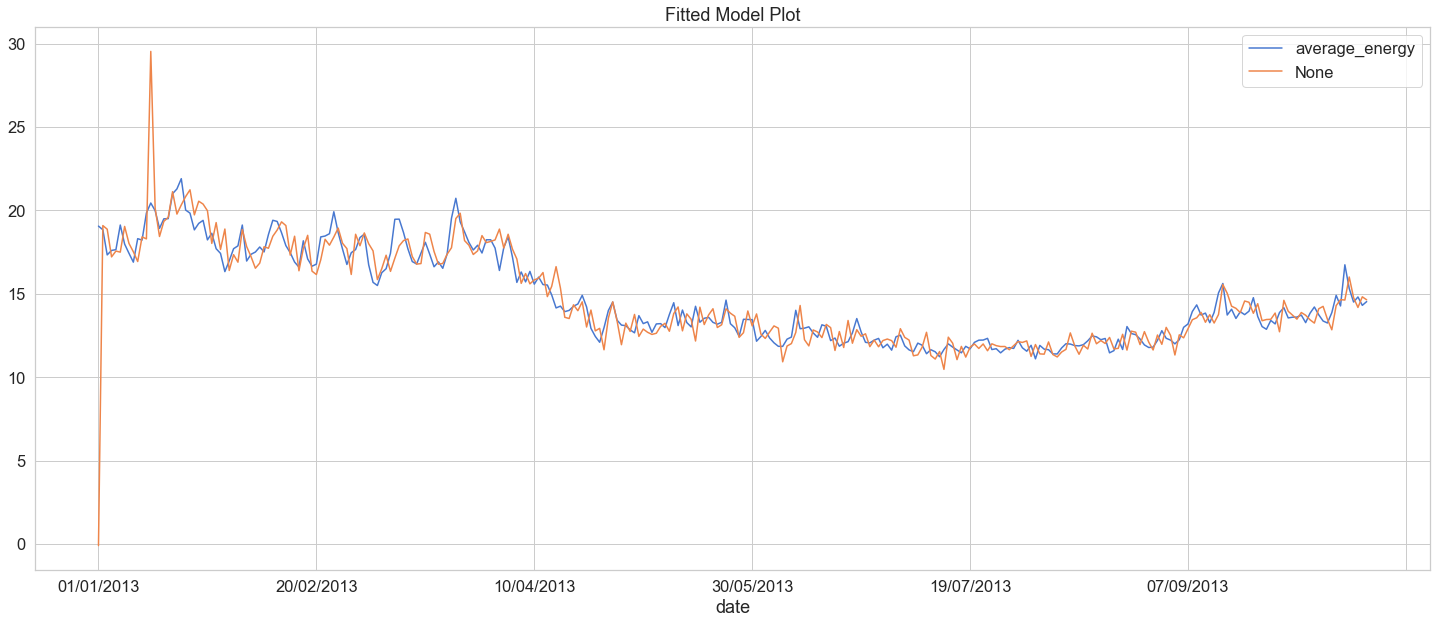

In [90]:
# checking how well the model is fitting 
FMP=Training_Set['average_energy'].plot(figsize=(25,10))
FMP.set_title("Fitted Model Plot")
Model1_fit.fittedvalues.plot()
FMP.legend()
plt.show()

In [91]:
# predicting using test set
# creating Predicted_Energy column that shows the predicted energy for each day
Prediction = Model1_fit.predict(start = len(Training_Set),end = len(Training_Set)+len(Testing_Set)-1,exog = sm.add_constant(Testing_Set[['temperatureMax','dewPoint','uvIndex','temperatureLow','temperatureMin','temperatureHigh', 'Bank_Holiday_Indicator']]))
Testing_Set['Predicted_Energy'] = Prediction.values
Testing_Set['residual'] = Testing_Set.average_energy - Testing_Set.Predicted_Energy
Testing_Set.head(5)

,average_energy,temperatureMax,dewPoint,uvIndex,temperatureLow,temperatureMin,temperatureHigh,Bank_Holiday_Indicator,Predicted_Energy,residual
date,,,,,,,,,,
19/10/2013,14.683229,17.04,12.21,1.0,12.16,12.16,17.04,0,14.481318,0.201911
20/10/2013,15.649554,17.53,13.38,1.0,16.32,13.26,17.53,0,15.240140,0.409414
21/10/2013,14.300446,18.03,14.21,1.0,13.79,13.79,18.03,0,14.629142,-0.328696
22/10/2013,13.932879,16.53,10.86,1.0,6.83,9.99,16.53,0,14.853610,-0.920731
23/10/2013,13.810183,16.91,9.37,1.0,13.14,6.83,16.91,0,15.341051,-1.530867


In [92]:
MAPE = np.mean(np.abs((Testing_Set['average_energy'] - Testing_Set['Predicted_Energy']) / Testing_Set['average_energy'])) * 100
print("Mean Absolute Percentage Error (MAPE):", round(MAPE,2))
MAE = Testing_Set['residual'].sum()/len(Testing_Set)
print("Mean Absolute Error (MAE):", round(MAE,2))
RMSE=rmse(Testing_Set['average_energy'], Testing_Set['Predicted_Energy'])
print('RMSE:',round(RMSE,2))

Mean Absolute Percentage Error (MAPE): 4.42
Mean Absolute Error (MAE): 0.05
RMSE: 0.94


In [ ]:
# plotting average energy and predicted energy from testing set
TSP = Testing_Set['average_energy'].plot(figsize=(25,10),color = 'steelblue')
TSP.set_title("Average Energy vs Predicted Energy (Testing Set)")
Testing_Set['Predicted_Energy'].plot(color = "orange")
TSP.set_ylabel("Energy")
TSP.legend()
plt.show()

In [ ]:
# model residual plot
M1R = Model1_fit.resid.plot(figsize= (30,5))
M1R.set_title("Residual Plot")